# OpendTect points to seismic subimages


## Read OdT data

First we want to read the OdT pointset files.

In [73]:
with open("/home/matt/Downloads/salt.pck", 'r') as f:
    data = f.read()
    
print(data[:300])

dTect V6.4
PickSet Group
ons. 18 sep 2019, 14:00:16
!
Z-Unit: Seconds
!
616522.7177599	6081983.02383028	1.78091901	24.99897766	1.57079637	0.02792416
616612.8505724	6081985.54336153	1.74458008	24.99897766	1.57079637	0.02792416
616951.00779896	6081994.99355684	1.67791951	24.99897766	1.57079637	0.02792


This seems to be:

- UTMx, UTMy, TWTT, something, something, something

In [56]:
import numpy as np

def read_odt_pts(fname):
    data = np.loadtxt(fname, skiprows=6, comments='!', usecols=[0,1,2])
    return data

In [57]:
# Example
fname = "/home/matt/Downloads/salt.pck"
d = read_odt_pts(fname)
d

array([[6.16522718e+05, 6.08198302e+06, 1.78091901e+00],
       [6.16612851e+05, 6.08198554e+06, 1.74458008e+00],
       [6.16951008e+05, 6.08199499e+06, 1.67791951e+00],
       [6.16984838e+05, 6.08199594e+06, 1.63165966e+00],
       [6.17176587e+05, 6.08200130e+06, 1.60028747e+00],
       [6.17503880e+05, 6.08201045e+06, 1.59560456e+00],
       [6.17955709e+05, 6.08202307e+06, 1.62453077e+00],
       [6.18294879e+05, 6.08203255e+06, 1.65339516e+00],
       [6.18622987e+05, 6.08204172e+06, 1.68029861e+00],
       [6.19132597e+05, 6.08205596e+06, 1.70935266e+00],
       [6.19291260e+05, 6.08206040e+06, 1.68776755e+00],
       [6.19665473e+05, 6.08207086e+06, 1.67030214e+00],
       [6.19778931e+05, 6.08207403e+06, 1.66545579e+00],
       [6.16691731e+05, 6.08198775e+06, 1.78107929e+00]])

In [58]:
f3_corners_xy = np.array([
    [605835.5, 6073556.3],
    [629576.3, 6074219.9],
    [629122.5, 6090463.2]
   ])

f3_corners_ix = np.array([[0,  0],
                          [0, 950],
                          [650, 950]
                         ])

import bruges as bg

transform = bg.transform.CoordTransform(f3_corners_ix, f3_corners_xy)

In [59]:
# Example:
transform.reverse(d[0, :2])

array([325, 437])

In [60]:
# Put it all together
def pts_to_ixt(fname, dt=0.004):
    data = read_odt_pts(fname)
    transform = bg.transform.CoordTransform(f3_corners_ix, f3_corners_xy)
    ix = [transform.reverse(r) for r in data[:, :2]]
    t = (data[:, 2][:, None] / dt).astype(int)
    ixt = np.hstack([ix, t])
    return ixt

ixt = pts_to_ixt("/home/matt/Downloads/salt.pck")

In [61]:
ixt.shape

(14, 3)

In [62]:
ixt

array([[325, 437, 445],
       [325, 440, 436],
       [325, 454, 419],
       [325, 455, 407],
       [325, 463, 400],
       [325, 476, 398],
       [325, 494, 406],
       [325, 508, 413],
       [325, 521, 420],
       [325, 541, 427],
       [325, 548, 421],
       [325, 562, 417],
       [325, 567, 416],
       [325, 443, 445]])

## Extract data

In [66]:
# This is 278MB in memory
f3 = np.random.randint(0, 256, size=(650, 950, 450), dtype=np.uint8)

In [74]:
samples = []
for (i, x, t) in ixt:
    sample = f3[i-3:i+3, x-3:x+3, t]
    samples.append(sample)

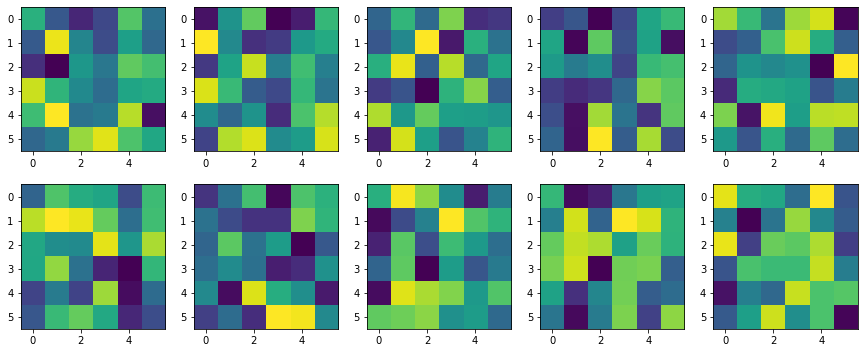

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for ax, sample in zip(axs.ravel(), samples[:10]):
    ax.imshow(sample)